In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl

data_FashionMnist = tf.keras.datasets.fashion_mnist

In [36]:
(tr_img, tr_lbl), (ts_img, ts_lbl) = data_FashionMnist.load_data()

In [37]:
# In labels, the classes are addressed in integer format, 
# thus we use a list to store classnames, where index 
# of the class label corresponds to its label in the dataset.
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 
    'Dress', 'Coat','Sandal', 
    'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

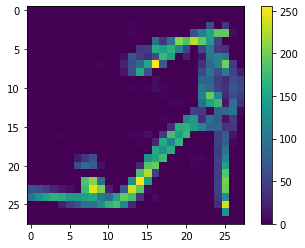

In [38]:
pl.figure()
pl.imshow(tr_img[8])
pl.colorbar()
pl.grid(False)
pl.show()

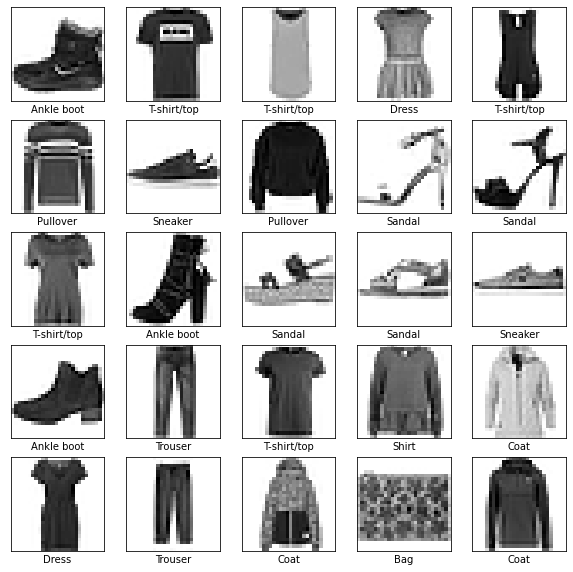

In [42]:
# tr_img, ts_img = tr_img / 255.0, ts_img / 255.0

pl.figure(figsize=(10, 10))

for i in range(25):
    pl.subplot(5, 5, i+1)
    pl.xticks([])
    pl.yticks([])
    pl.grid(False)
    pl.imshow(tr_img[i], cmap=pl.cm.binary)
    pl.xlabel(class_names[tr_lbl[i]])
pl.show()


In [51]:
from keras.activations import relu, softmax
from tensorflow.keras.layers import Flatten, Dense, Dropout, Softmax
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import adam_v2

In [68]:
model = tf.keras.Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(256, activation=relu),
        Dropout(0.25),
        Dense(10, activation=softmax)
    ], 
    name="Fashion-MNIST-model"
)

model.compile(
    loss= SparseCategoricalCrossentropy(from_logits= True),
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ['accuracy']
)

model.fit(tr_img, tr_lbl, epochs= 10, batch_size= 64, verbose= 1)
model.evaluate(ts_img, ts_lbl,  batch_size= 64, verbose= 1)


Epoch 1/10


C:\Users\ahsan\anaconda3\envs\OCR\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


938/938 [==============================] - 4s 4ms/step - loss: 3.2942 - accuracy: 0.6683
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.7673 - accuracy: 0.7217
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6959 - accuracy: 0.7497
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.6686 - accuracy: 0.7615
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.6553 - accuracy: 0.7645
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6600 - accuracy: 0.7668
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6443 - accuracy: 0.7727
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6415 - accuracy: 0.7767
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6282 - accuracy: 0.7814
Epoch 10/10
157/157 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.8193


[0.5265542268753052, 0.8192999958992004]

The given item is an Pullover
The given item is an T-shirt/top
The given item is an Sandal
The given item is an Sneaker
The given item is an Trouser


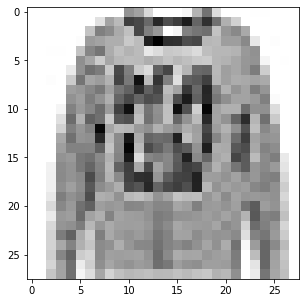

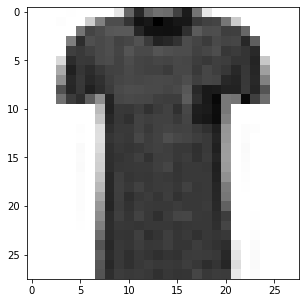

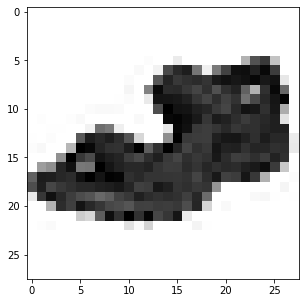

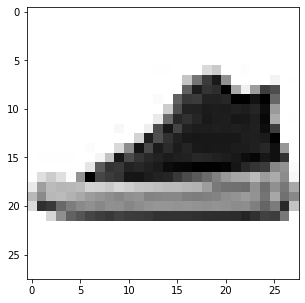

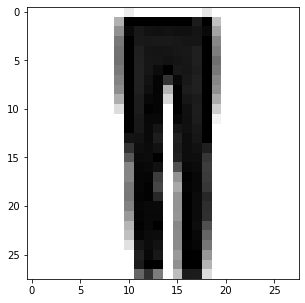

In [78]:
pridiction_model= tf.keras.Sequential(
    [
        model,
        Softmax()
    ], name= "Pridiction-Model"
)


# Getting Pridictions for all test images and storing in a variable.
pridictions = pridiction_model(ts_img)

for i in range(5):
    pl.figure(figsize=(5, 5))
    pl.xticks([])
    pl.yticks([])
    pl.grid(False)
    pl.imshow(ts_img[i + 500], cmap=pl.cm.binary)
    pr = np.argmax(pridictions[i+ 500])
    print("The given item is an", class_names[pr])

pl.show()


